In [1]:
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

In [2]:
def HA(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all A bonds on the lattice
    
        HA1 = Bonds A: (4x+3, y+1) <--> (4x+4, y),  x' = 4x+3,   x = 4x + 4 
        HA2 = Bonds A: (4x+1, y) <--> (4x+2, y),  x' = 4x+1,   x = 4x + 2
        HA = HA1 + HA2"""
        
    #creates an array with all values of the lattice sites that construct the A bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(3, 4 * n, 4)  # 4x + 3
    B = np.arange(4, 4 * n + 1, 4)  # 4x + 4
    C = np.arange(1, 4 * n, 4)  # 4x + 1
    D = np.arange(2, 4 * n + 1, 4)  # 4x + 2


    HA1 = np.zeros((Lx, Lx), dtype=complex)
    HA2 = np.zeros((Lx, Lx), dtype=complex)

    HA1[A - 1, B - 1] = np.exp(1j * ky)
    HA1[B - 1, A - 1] = np.exp(-1j * ky)
    HA2[C - 1, D - 1] = 1
    HA2[D - 1, C - 1] = 1
    HA = HA1 + HA2
    return HA


def HB(n, Lx, ky):
    """  This function constructs the full Hamiltonian for all B bonds on the lattice
    
        HB1 = Bonds B: (4x+2, y+1) <--> (4x+1, y), x' = 4x + 2,   x = 4x + 1 
        HB2 = Bonds B: (4x+3, y) <--> (4x+4, y), x' = 4x + 3,   x = 4x + 4
        HB = HB1 + HB2 """

    #creates an array with all values of the lattice sites that construct the B bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(2, 4 * n, 4)  # 4x + 2
    B = np.arange(1, 4 * n, 4)  # 4x + 1
    C = np.arange(3, 4 * n, 4)  # 4x + 3
    D = np.arange(4, 4 * n + 1, 4)  # 4x + 4

    HB1 = np.zeros((Lx, Lx), dtype=complex)
    HB2 = np.zeros((Lx, Lx), dtype=complex)

    HB1[A - 1, B - 1] = np.exp(1j * ky)
    HB1[B - 1, A - 1] = np.exp(-1j * ky)
    HB2[C - 1, D - 1] = 1
    HB2[D - 1, C - 1] = 1

    HB = HB1 + HB2

    return HB


def HC(n, Lx):
    
    """ This function constructs the full Hamiltonian for all C bonds on the lattice
    
        HC1 = Bonds C: (4x, y) <--> (4x+1, y ), x' = 4x,   x = 4x + 1
        HC2 = Bonds C: (4x+2, y) <--> (4x+3, y), x' = 4x + 2,   x = 4x + 3
        HC = HC1 + HC2  """

    #creates an array with all values of the lattice sites that construct the C bonds
    #in a range of lattice sites of 4*n
    
    A = np.arange(4, 4 * n, 4)  # 4x
    B = np.arange(5, 4 * n + 1, 4)  # 4x + 1
    C = np.arange(2, 4 * n , 4)  # 4x + 2
    D = np.arange(3, 4 * n , 4)  # 4x + 3

    HC1 = np.zeros((Lx, Lx), dtype=complex)
    HC2 = np.zeros((Lx, Lx), dtype=complex)
  
    HC1[A - 1, B - 1] = 1
    HC1[B - 1, A - 1] = 1
    HC2[C - 1, D - 1] = 1
    HC2[D - 1, C - 1] = 1

    HC = (HC1 + HC2) 

    return HC

In [3]:
def floquet_operator(n, Lx, ky, t,noise):
    """ This function constructs the full Floquet operator for the lattice """
    
    HA1 = HA(n, Lx, ky)
    HB1 = HB(n, Lx, ky)
    HC1 = HC(n, Lx)
    
    #creates the full Floquet operator
    Floquet = np.exp(-1j*t*(1 + noise[0][0])*HA1/3)@np.exp(-1j*t*(1 + noise[0][1])*HB1/3)@np.exp(-1j*t*(1 + noise[0][2])*HC1/3)
    
    return Floquet

In [4]:
def U(n, Lx, T, ky,noise):
    
    """ This function defines the time-evolution function U(T) """
    
    H1 = - J * HA(n, Lx, ky) - Jprime * (HB(n, Lx, ky) + HC(n, Lx))
    H2 = - J * HB(n, Lx, ky) - Jprime * (HA(n, Lx, ky) + HC(n, Lx))
    H3 = - J * HC(n, Lx) - Jprime * (HA(n, Lx, ky) + HB(n, Lx, ky))

    (E1,V1)=np.linalg.eigh(H1)

    (E2,V2)=np.linalg.eigh(H2)

    (E3,V3)=np.linalg.eigh(H3)


    U_m = (V3 @ np.diag(np.exp(-1j*E3*(T/3 + noise[0][0]))) @ V3.conj().T) @ (V2 @ np.diag(np.exp(-1j*E2*(T/3 + noise[0][1]))) @ V2.conj().T) @ (V1 @ np.diag(np.exp(-1j*E1*(T/3 + noise[0][2]))) @ V1.conj().T)
    #fix the loop such that the ky must be same.
    return U_m

In [5]:
def adjoint(psi):
    return psi.conjugate().transpose()
def psi_to_rho(psi):
    return numpy.outer(psi,psi.conjugate())
def exp_val(psi, op):
    return numpy.real(numpy.dot(adjoint(psi),op.dot(psi)))
def norm_sq(psi):
    return numpy.real(numpy.dot(adjoint(psi),psi))
def normalize(psi,tol=1e-9):
    ns=norm_sq(psi)**0.5
    if ns < tol:
        raise ValueError
    return psi/ns
def is_herm(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M-adjoint(M)
    return max(numpy.abs(diff.flatten())) < tol
def is_unitary(M,tol=1e-9):
    if M.shape[0]!=M.shape[1]:
        return False
    diff=M.dot(adjoint(M))-numpy.identity((M.shape[0]))
    return max(numpy.abs(diff.flatten())) < tol
def eigu(U,tol=1e-9):
    (E_1,V_1)=numpy.linalg.eigh(U+adjoint(U))
    U_1=adjoint(V_1).dot(U).dot(V_1)
    H_1=adjoint(V_1).dot(U+adjoint(U)).dot(V_1)
    non_diag_lst=[]
    j=0
    while j < U_1.shape[0]:
        k=0
        while k < U_1.shape[0]:
            if j!=k and abs(U_1[j,k]) > tol:
                if j not in non_diag_lst:
                    non_diag_lst.append(j)
                if k not in non_diag_lst:
                    non_diag_lst.append(k)
            k+=1
        j+=1
    if len(non_diag_lst) > 0:
        non_diag_lst=numpy.sort(numpy.array(non_diag_lst))
        U_1_cut=U_1[non_diag_lst,:][:,non_diag_lst]
        (E_2_cut,V_2_cut)=numpy.linalg.eigh(1.j*(U_1_cut-adjoint(U_1_cut)))
        V_2=numpy.identity((U.shape[0]),dtype=V_2_cut.dtype)
        for j in range(len(non_diag_lst)):
            V_2[non_diag_lst[j],non_diag_lst]=V_2_cut[j,:]
        V_1=V_1.dot(V_2)
        U_1=adjoint(V_2).dot(U_1).dot(V_2)
    # Sort by phase
    U_1=numpy.diag(U_1)
    inds=numpy.argsort(numpy.imag(numpy.log(U_1)))
    return (U_1[inds],V_1[:,inds]) # = (U_d,V) s.t. U=V*U_d*V^\dagger

In [9]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52        # Number of lattice sites along the y direction   
J = 1       # Hopping coefficient 
Jprime =0.10      # Number of lattice sites along the y direction
T_A  = 3*np.pi/6 
W = 0.0
omegaA = (2*np.pi)/T_A 

In [10]:
#---------------------------- Calculating and Graphing the Quasienergy Spectrum---------------------------------#

# Momentum space to calculate the quasienergy for the anomalous and haldane 
ky_list = np.linspace(-np.pi, np.pi, 100)

# Lists which will hold the values for the anomalous phase during the loop
quasienergies_listA  = [] 
eigenfunctions_listA= []

# Lists which will hold the values for the Haldane phase during the loop
quasienergies_listH  = [] 
eigenfunctions_listH= []
random = np.random.uniform(-W,W,(1,3))
# Calculates the quasienergy for period T with values ky 
for ky in ky_list:
    # Anomalous 
    lamdaA, V = eigu(U(n,Lx,T_A,ky,random))# within some ky pass the same noise realisation.
    quasienergies_listA.append(-np.log(lamdaA)*(-1j/T_A))
    eigenfunctions_listA.append(V)
    

# Anomalous
quasienergiesA = np.asanyarray(quasienergies_listA)
eigenfunctionsA = np.asanyarray(eigenfunctions_listA)


#-------------------------------------------- Time Evolution to Visualize Particle Edge Motion ------------------------------------------#

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_51045/291242421.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_51045/291242421.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')


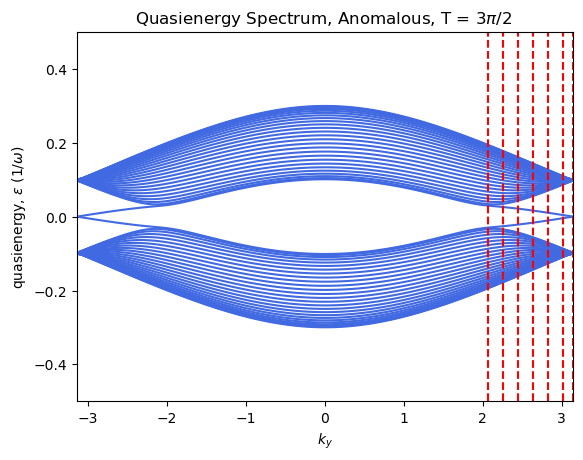

In [11]:
# Plots the graph quasienergy vs ky at total period T for the anomalous phase
plt.figure()
plt.plot(ky_list,quasienergiesA/omegaA,  color = 'royalblue')
plt.title(label = 'Quasienergy Spectrum, Anomalous, T = ${3 \pi}/{2}$ ' )
plt.xlabel('$k_y$')
plt.ylabel('quasienergy, $\epsilon$ (1/$\omega$)')
plt.ylim(-0.5,0.5)
plt.xlim(-np.pi,np.pi)

# Draw vertical lines at specified ky_list indices
for idx in [82, 85, 88, 91, 94, 97, 99]:
    plt.axvline(x=ky_list[idx], color='red', linestyle='--')

plt.show()

[[0.00740078 0.01477707 0.02210384 ... 0.03174302 0.02124973 0.01065129]
 [0.02477344 0.04921076 0.07298043 ... 0.06382518 0.04314347 0.02175123]
 [0.02753337 0.05435432 0.07977019 ... 0.10268516 0.07015078 0.03559085]
 ...
 [0.03559085 0.07015078 0.10268516 ... 0.07977019 0.05435432 0.02753337]
 [0.02175123 0.04314347 0.06382518 ... 0.07298043 0.04921076 0.02477344]
 [0.01065129 0.02124973 0.03174302 ... 0.02210384 0.01477707 0.00740078]]


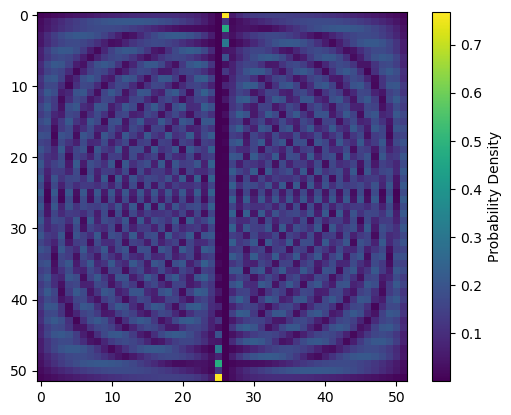

In [12]:
plt.imshow(np.abs(eigenfunctionsA[88]))
plt.colorbar(label='Probability Density')
print(np.abs(eigenfunctionsA[88]))
#print(np.abs(np.transpose(eigenfunctionsA[88])[:][250]))

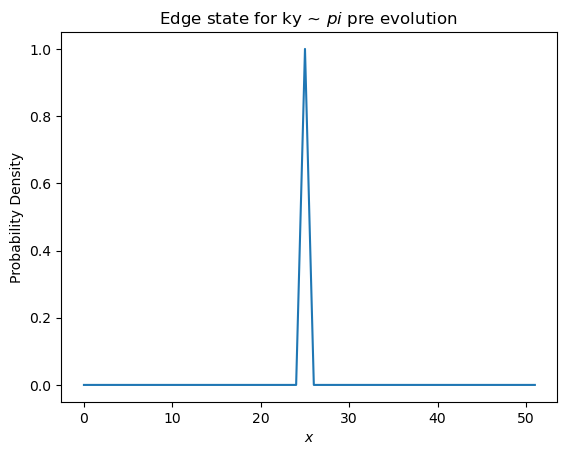

In [13]:
#plt.imshow(np.abs(eigenfunctionsA[99]))
i = 25
init_wave = np.transpose(eigenfunctionsA[99])[:][i]
init_wave = np.zeros(4 * n, dtype=complex)
init_wave[25] = 1.0
#plt.plot(np.arange(4*n),np.abs(np.transpose(eigenfunctionsA[99])[:][i]), label = 'ky = 0')
plt.plot(np.arange(4*n),np.abs(init_wave), label = 'ky = ${pi}$')
plt.title(label = 'Edge state for ky ~ ${pi}$ pre evolution ' )
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.show()

In [14]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52
J = 1       # Hopping coefficient 
Jprime =0.10        # Hopping coefficent 
m = 50      # Multiples of T
W = 0.0   # Noise strength
# Variables for anomalous 
T_A  = 3*np.pi/6        # Driving period 
t_A = np.arange(0 ,m*T_A, T_A)      # Mutlples of driving period for 
omegaA = (2*np.pi)/T_A 

In [15]:
def propagate(W, seed):
    ky_list = np.linspace(-np.pi, np.pi, 100)
    GA = np.zeros((len(t_A), Lx, Lx), dtype = complex)
    ky = 3
    for step in range(0, len(t_A)):
        seed = seed + step
        np.random.seed(seed)
        random = np.random.uniform(-W,W,(1,3))
        if step == 0:
            GA[step,:,:] = U(n, Lx, T_A, ky_list[99],random)
        else:
            GA[step,:,:] = U(n, Lx,  (t_A[step] - t_A[step-1]), ky_list[99],random) @ GA[step - 1,:,:]
    return GA


In [16]:
def time_evolv(initial_wave,seed):
    GA = propagate(W,seed)
    final_waves = []
    for step in range(0, len(t_A)):
        if step == 0:
            final_waves.append(initial_wave)
        else:
            final_waves.append(GA[step,:,:]@initial_wave)
    return final_waves

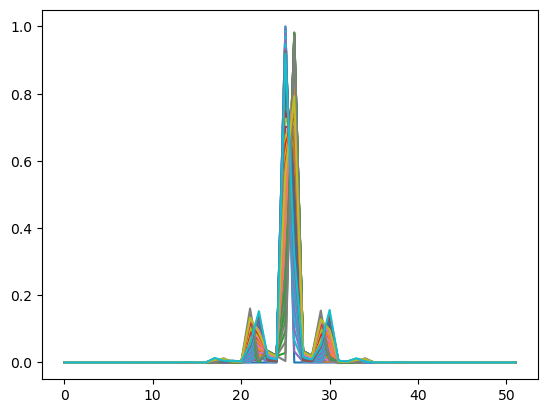

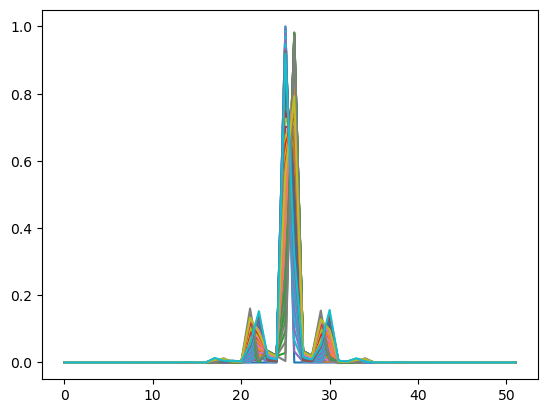

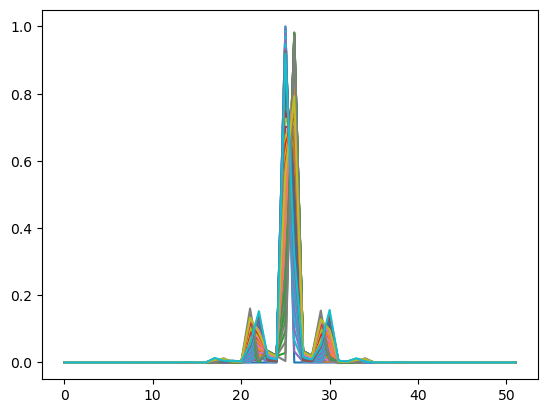

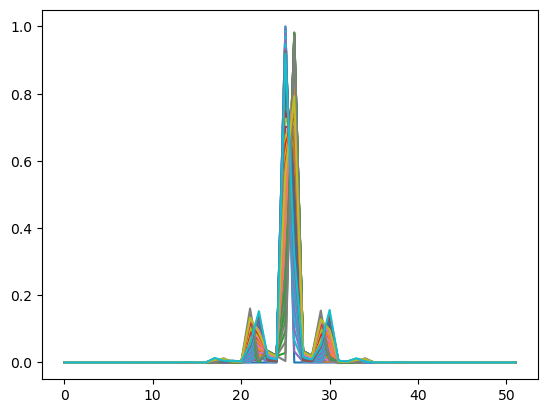

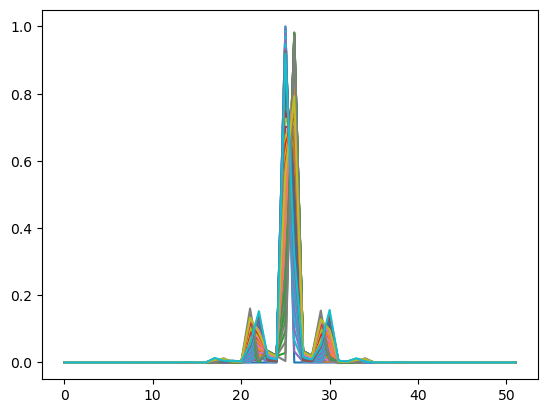

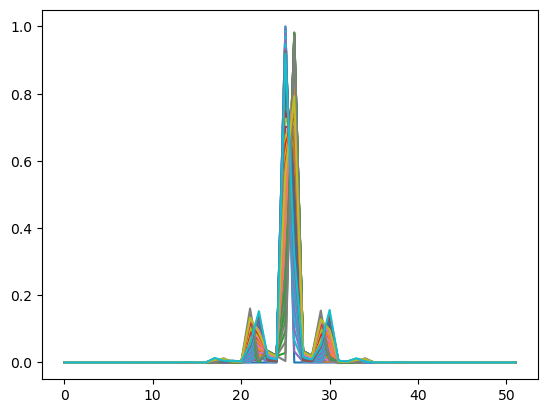

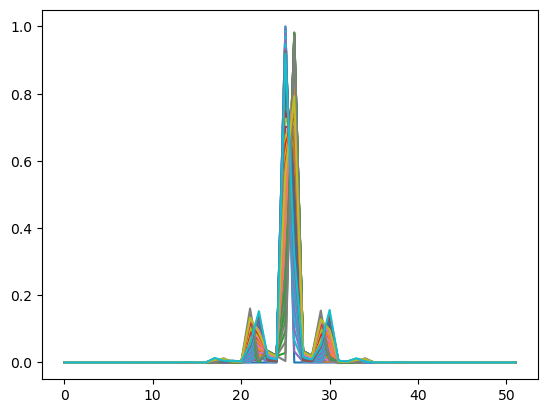

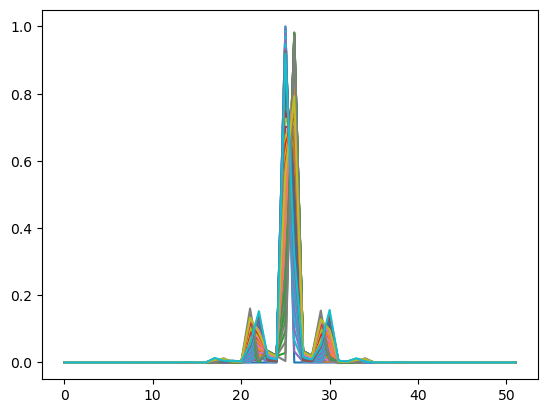

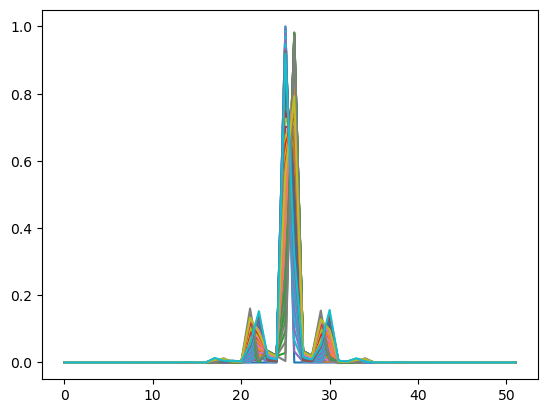

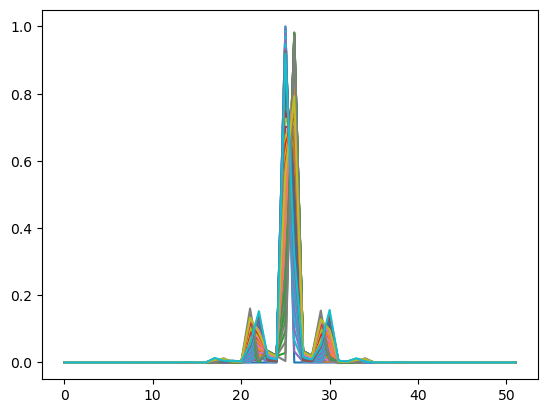

In [18]:
final= []
for i in range(10):
    seed  = 1000*i
    final.append(time_evolv(init_wave,seed))
#finale = time_evolv(init_wave)
for j in range(10):
    for i in range(0,len(t_A)):
        plt.plot(np.arange(4*n),np.abs(final[j][i]), label = 'ky = 0')
    plt.show()

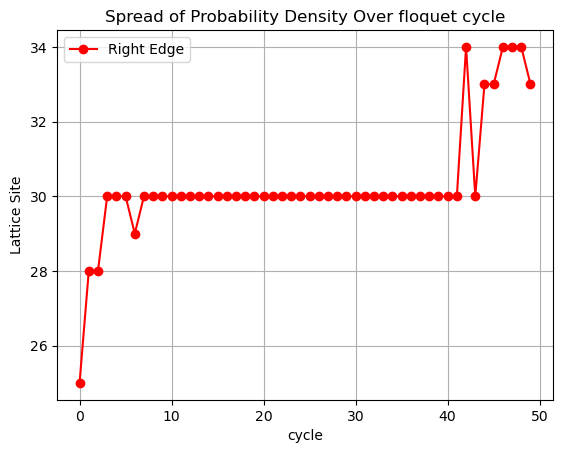

In [21]:
# Define a threshold for detecting the edge of the probability density
threshold = 1e-4  # Adjust this value as needed
seed_index = 0  # Choose the seed index to analyze

# Store the edges of the probability density
edges = []

for i in range(len(t_A)):
    probability_density = np.abs(final[seed_index][i])**2
    edge_positions = np.where(probability_density > threshold)[0]
    if len(edge_positions) > 0:
        edges.append((edge_positions[0], edge_positions[-1]))  # First and last non-zero positions
    else:
        edges.append((None, None))  # No significant density

# Plot the edges as a function of time
left_edges = [edge[0] for edge in edges if edge[0] is not None]
right_edges = [edge[1] for edge in edges if edge[1] is not None]
times = [t_A[i] for i, edge in enumerate(edges) if edge[0] is not None]

# Plot the right edge as a function of time
plt.figure()
plt.plot(range(len(right_edges)), right_edges, marker='o', color='red', label='Right Edge')
plt.title('Spread of Probability Density Over floquet cycle')
plt.xlabel('cycle')
plt.ylabel('Lattice Site')
plt.legend()
plt.grid()
plt.show()


In [22]:
n =13   # Number of unit lattices 
Lx = 4*n        # Number of lattice sites along the x direction
Ly = 52
J = 1       # Hopping coefficient 
Jprime =0.10        # Hopping coefficent 
m = 50      # Multiples of T
W = 0.2   # Noise strength
# Variables for anomalous 
T_A  = 3*np.pi/6        # Driving period 
t_A = np.arange(0 ,m*T_A, T_A)      # Mutlples of driving period for 
omegaA = (2*np.pi)/T_A 

In [23]:
def propagate(W, seed):
    ky_list = np.linspace(-np.pi, np.pi, 100)
    GA = np.zeros((len(t_A), Lx, Lx), dtype = complex)
    ky = 3
    for step in range(0, len(t_A)):
        seed = seed + step
        np.random.seed(seed)
        random = np.random.uniform(-W,W,(1,3))
        if step == 0:
            GA[step,:,:] = U(n, Lx, T_A, ky_list[99],random)
        else:
            GA[step,:,:] = U(n, Lx,  (t_A[step] - t_A[step-1]), ky_list[99],random) @ GA[step - 1,:,:]
    return GA


In [24]:
def time_evolv(initial_wave,seed):
    GA = propagate(W,seed)
    final_waves = []
    for step in range(0, len(t_A)):
        if step == 0:
            final_waves.append(initial_wave)
        else:
            final_waves.append(GA[step,:,:]@initial_wave)
    return final_waves

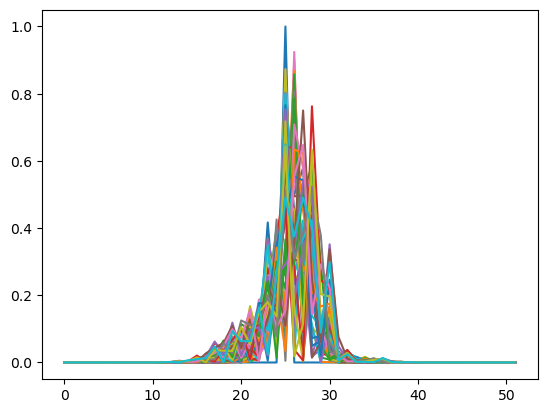

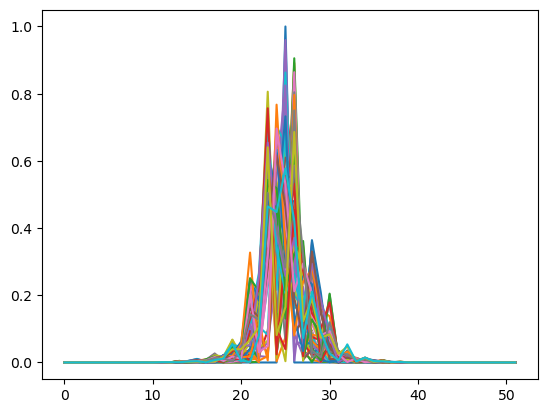

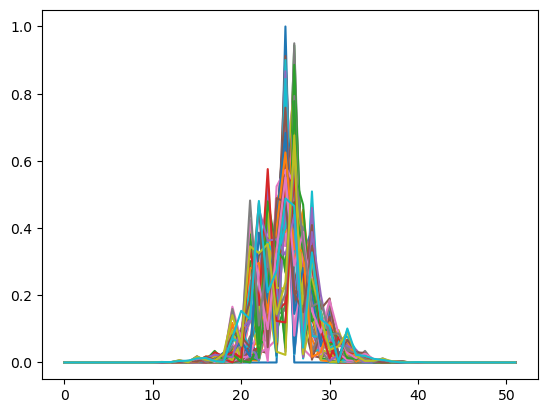

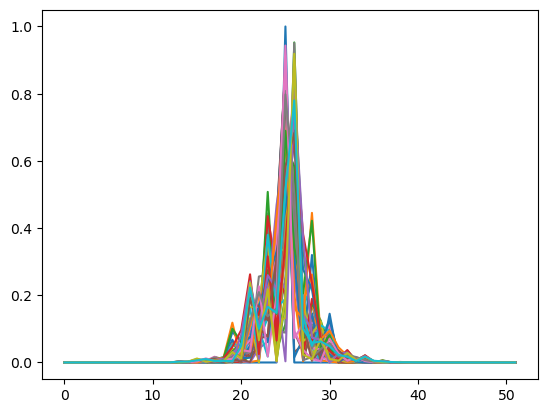

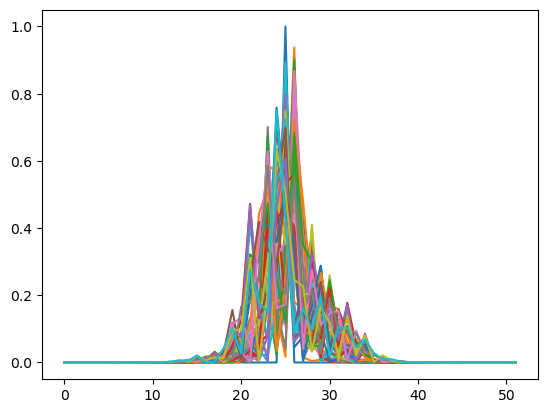

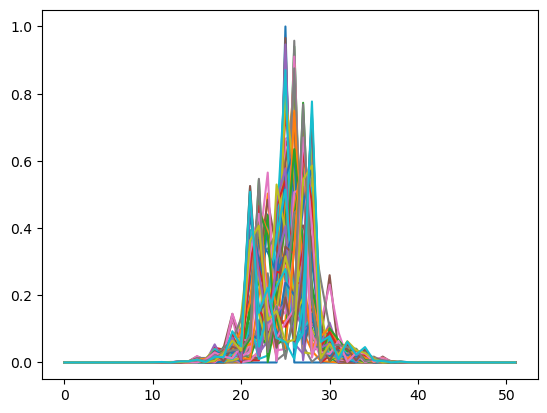

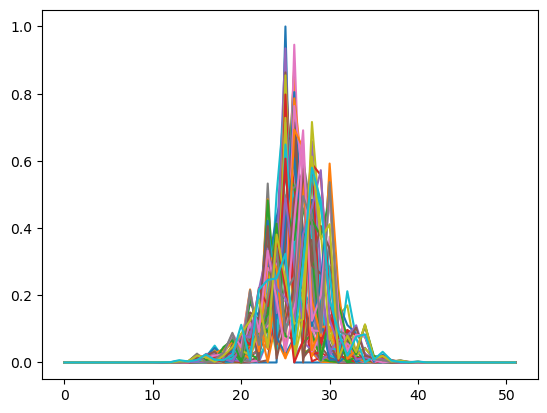

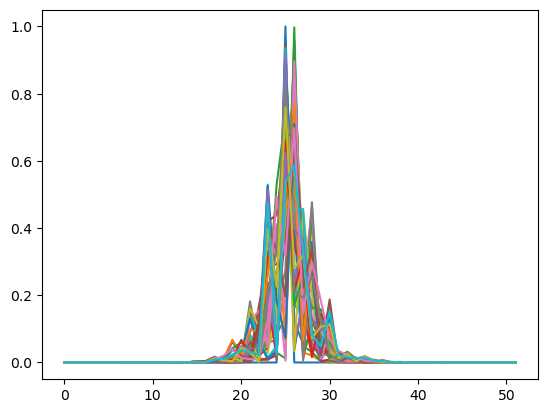

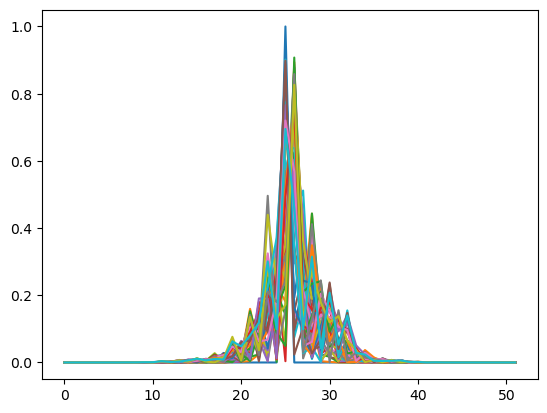

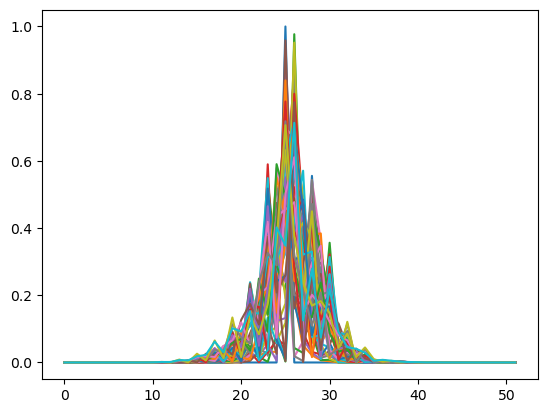

In [25]:
final= []
for i in range(10):
    seed  = 1000*i
    final.append(time_evolv(init_wave,seed))
#finale = time_evolv(init_wave)
for j in range(10):
    for i in range(0,len(t_A)):
        plt.plot(np.arange(4*n),np.abs(final[j][i]), label = 'ky = 0')
    plt.show()

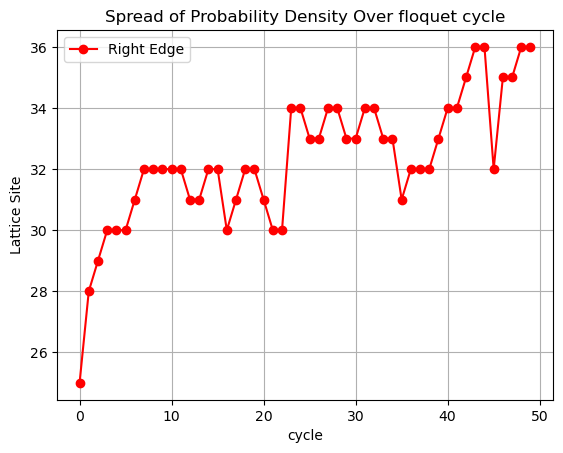

In [26]:
# Define a threshold for detecting the edge of the probability density
threshold = 1e-4  # Adjust this value as needed
seed_index = 0  # Choose the seed index to analyze

# Store the edges of the probability density
edges = []

for i in range(len(t_A)):
    probability_density = np.abs(final[seed_index][i])**2
    edge_positions = np.where(probability_density > threshold)[0]
    if len(edge_positions) > 0:
        edges.append((edge_positions[0], edge_positions[-1]))  # First and last non-zero positions
    else:
        edges.append((None, None))  # No significant density

# Plot the edges as a function of time
left_edges = [edge[0] for edge in edges if edge[0] is not None]
right_edges = [edge[1] for edge in edges if edge[1] is not None]
times = [t_A[i] for i, edge in enumerate(edges) if edge[0] is not None]

# Plot the right edge as a function of time
plt.figure()
plt.plot(range(len(right_edges)), right_edges, marker='o', color='red', label='Right Edge')
plt.title('Spread of Probability Density Over floquet cycle')
plt.xlabel('cycle')
plt.ylabel('Lattice Site')
plt.legend()
plt.grid()
plt.show()
